# ACIC 2017 Final: EButterfly SDM

## Description
Working with clients Katie Prudic and Jeff Oliver, we were tasked with using the Species Distribution Model (SDM) to create distribution maps for over all of the observations found in EButterfly.The data for each species was split into 13 sets: one for each month and one with all the data retrieved for a species. The general purpose of this project is to extract and clean the data from EButtefly, run it through the SDM and make it reproducible for other researchers.

The purpose of this notebook is to display the results of the above. Given one or more species scientifc names, this notebook will display the produced distribution maps.

Code and documentation can be found on github at:
https://github.com/foxtrotington/eButterfly-422Final

## Setup
Below are the absolute paths for the project directory and related data directories. Change to suit your system. The cells after those are background code for setting up the notebook and can be ignored.

Directory path for project repo (the directory the repo for the github listed above)

In [230]:
project_path = "~/final/eButterfly-422Final/"

Directory path that contains all of the SDM results

In [231]:
sdm_path = "/xdisk/jamesthornton/ebutterfly_sdm/"

Directory path that contains all of the __stacked__ SDM results

In [232]:
sdm_stacked_path = "/xdisk/dtruong/output/"

Import necessary python packages

In [233]:
from IPython.display import Image, display, Markdown
import pandas as pd
import os.path

Create python dictionary that maps Scientific name to EButterfly ID.

In [234]:
id_name_path = project_path + "data/id_name_map.txt"

name_id_map = {}

species = pd.read_csv(id_name_path, header=None, sep="-")
for index, row in species.iterrows():
    name_id_map[row[1]] = str(row[0])
    
month_map = {"year" : "All observations",
             "1" : "January",
             "2" : "February",
             "3" : "March",
             "4" : "April",
             "5" : "May",
             "6" : "June",
             "7" : "July",
             "8" : "August",
             "9" : "September",
             "10" : "October",
             "11" : "November",
             "12" : "December",
            }

Create input widgets

In [235]:
!(module load python)
!(jupyter nbextension enable --py widgetsnbextension > /dev/null 2>&1)
from ipywidgets import widgets
species_input_text = widgets.Textarea(placeholder = "Enter species name one per line")

algorithm_select = widgets.Select(options = ['CTA', 'GLM', 'RF'])

replicates_select = widgets.Select(options = ['1', '10', '50'])

stacked_check = widgets.Checkbox(value = False, description = "Show Stacked")

# User Input
## Input species names
Enter the scientific names of the species you are interested in the below text field.

In [236]:
display(species_input_text)

Textarea(value='', placeholder='Enter species name one per line')

Select the algorithm.

In [248]:
display(algorithm_select)

Select(index=2, options=('CTA', 'GLM', 'RF'), value='RF')

Select the number of replicates.

In [245]:
display(replicates_select)

Select(index=1, options=('1', '10', '50'), value='10')

Check the box if you want to see the map with all SDM's stacked. Uncheck if not.

In [239]:
display(stacked_check)

Checkbox(value=False, description='Show Stacked')

# Display Maps
After filling out, or making any changes to, the information above, run these cells to display the maps.

In [240]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Stacked SDM Maps for CTA/10 for all observations.

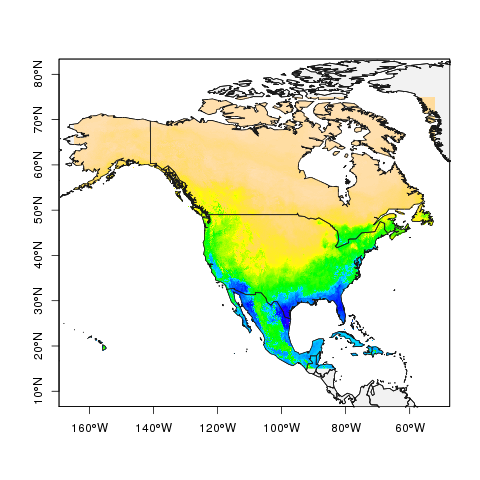

# Pyrgus ruralis
## eButterfly ID: 21

## All observations

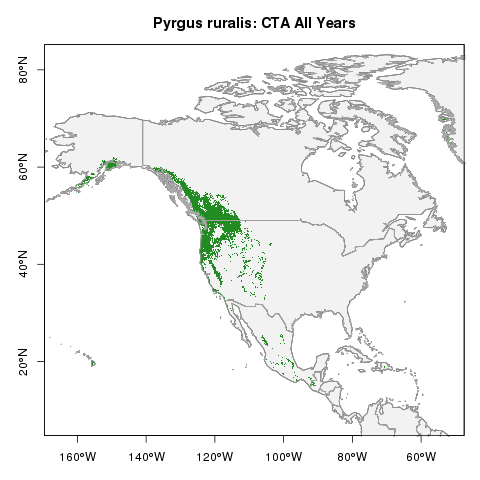

## March

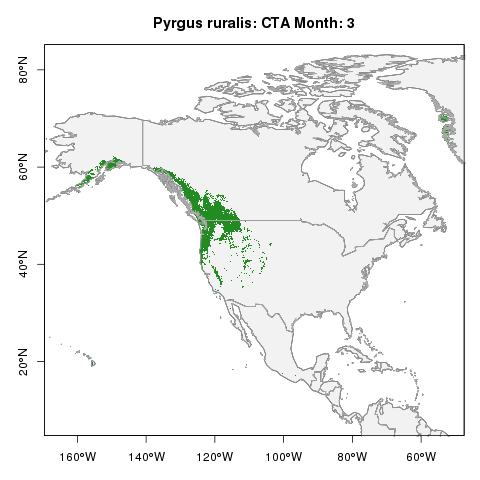

## April

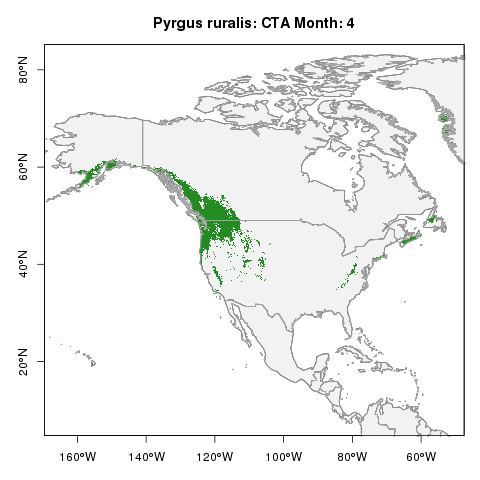

## May

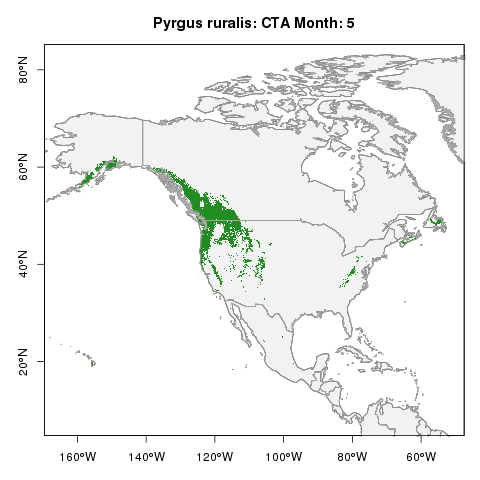

## June

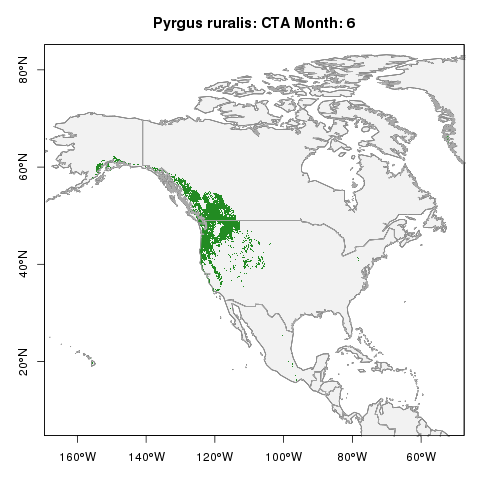

## July

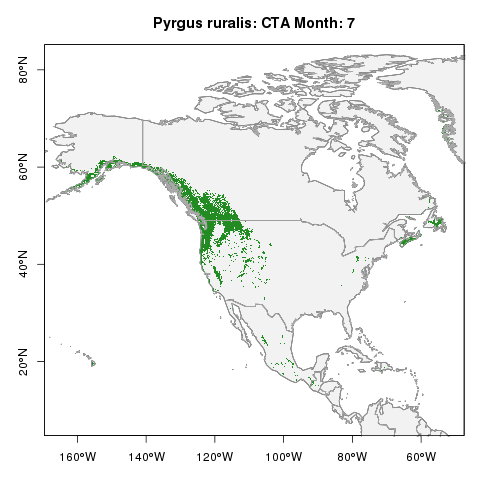

# Cyllopsis pyracmon
## eButterfly ID: 689

## All observations

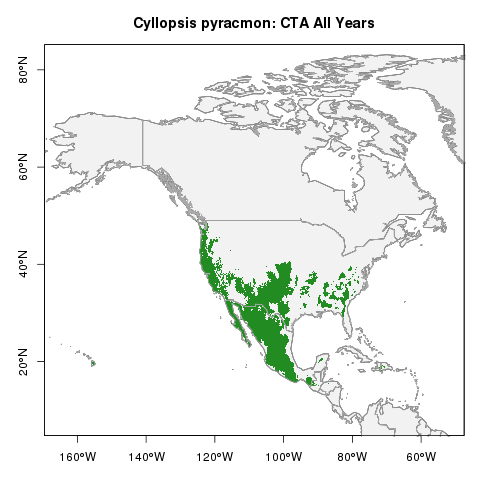

## May

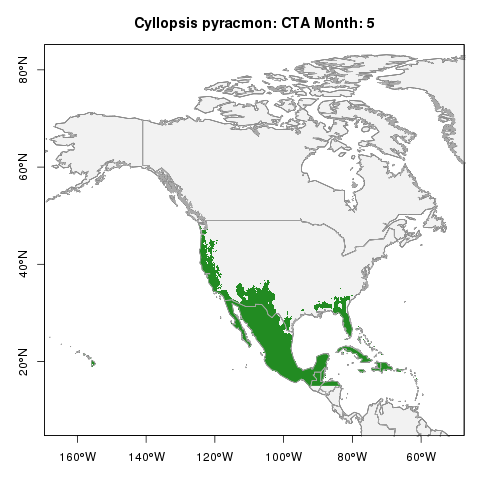

## August

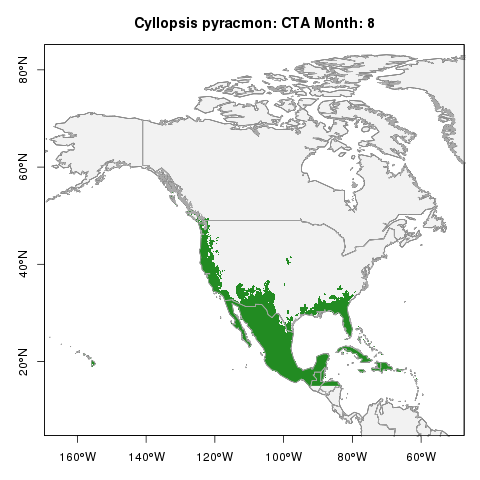

## September

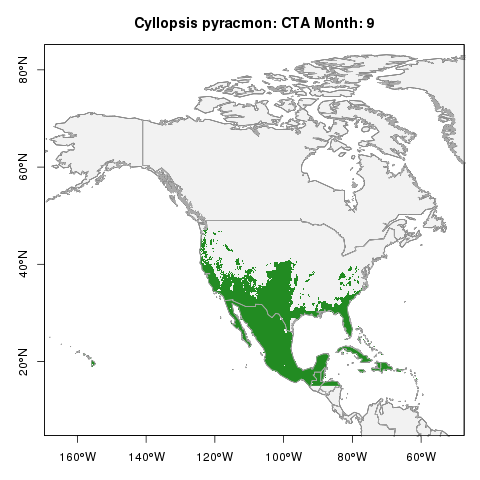

# Lethe portlandia
## eButterfly ID: 730

## All observations

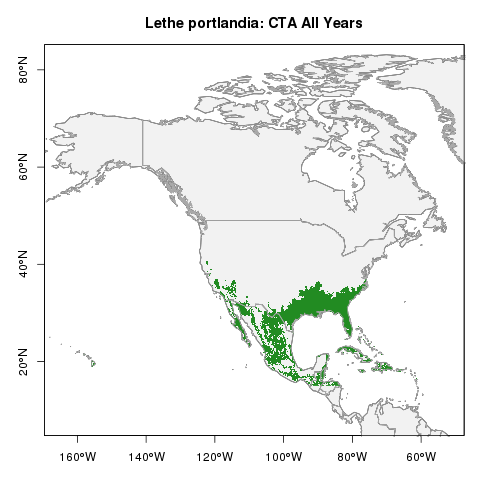

## April

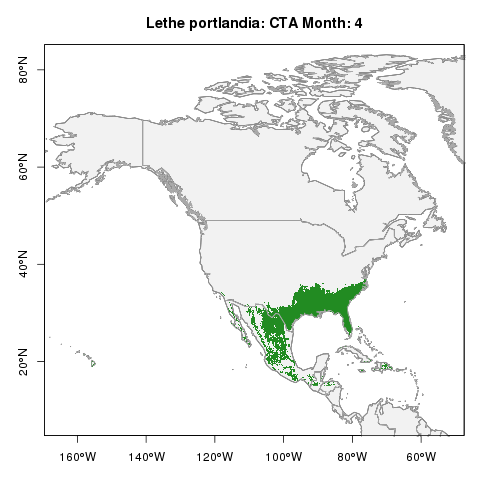

## July

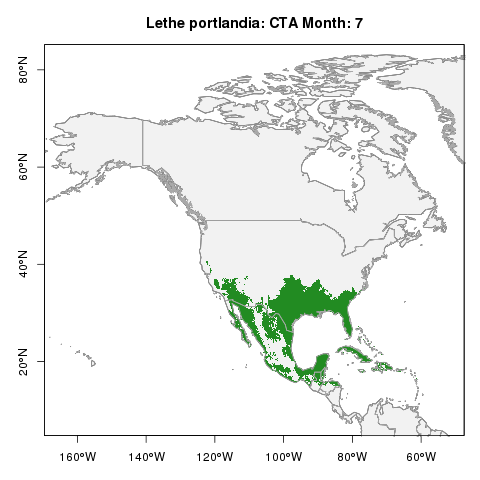

## August

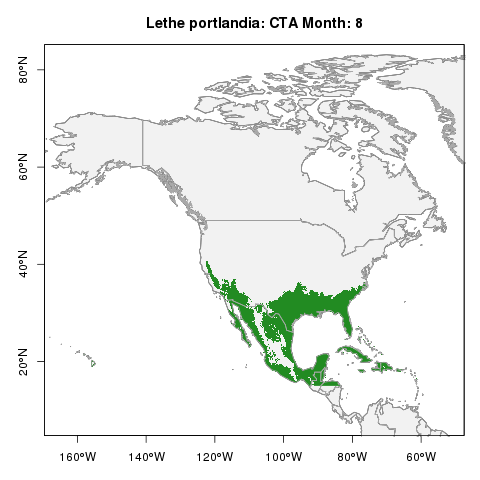

## September

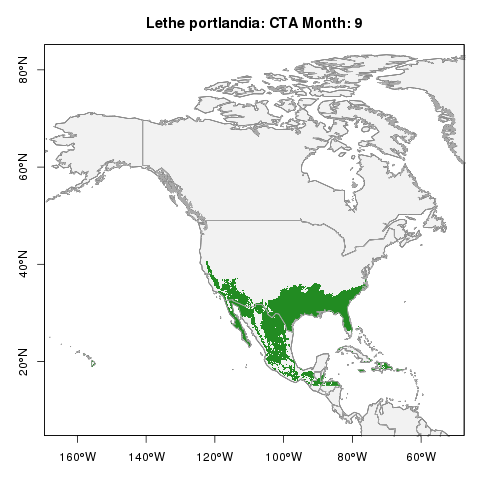

## October

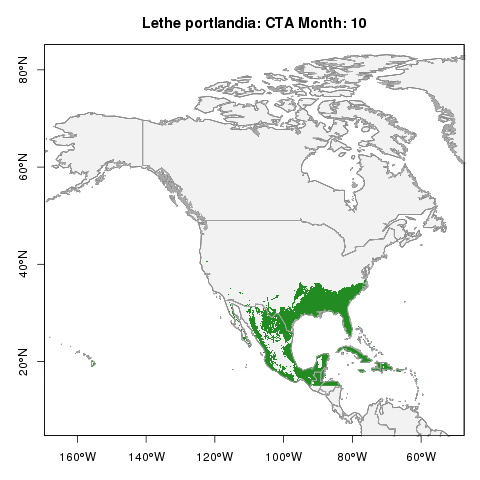

## November

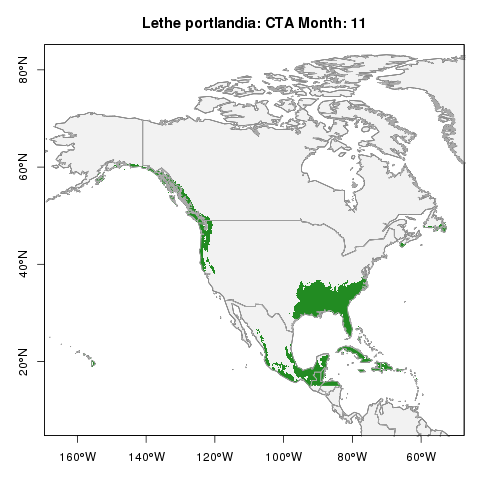

In [253]:
cache_dir = "/tmp/ebnb_cache/"
!(mkdir -p $cache_dir)
species_names = species_input_text.value.split("\n")
algo = algorithm_select.value
repl = replicates_select.value

# Display stacked map if box is checked
if (stacked_check.value):
    display(Markdown("## Stacked SDM Maps for " + algo + "/" + repl + " for all observations."))
    image_dir = sdm_stacked_path + algo + "/" + repl + "/"
    image_name = "final-" + algo + "-bg" + repl + "-stack.png"  
    display(Image(image_dir + image_name))

for name in species_names:
    if (name not in name_id_map):
        display(Markdown("# Error! Unknown species name: " + name + "\n"))
        continue
    
    ebid = name_id_map[name]
    display(Markdown("# " + name + "\n## eButterfly ID: " + ebid))
    
    # Untar the data for the species
    !(mkdir -p $cache_dir$ebid)
    tar_name = sdm_path + ebid + "/" + ebid + "." + algo + ".tar.gz"
    !(if [[ ! -d $cache_dir$ebid/$algo ]]; then tar xzC $cache_dir$ebid -f $tar_name ; fi)
    
    # Order the list of months
    months = !(ls -1 $cache_dir$ebid/$algo)
    sorted_months = [months[-1]] + list(map(str,sorted(list(map(int,months[:-1])))))
    
    # Display maps
    for month in sorted_months:
        display(Markdown("## " + month_map[month]))
        image_path = cache_dir + ebid + "/" + algo + "/" + month + "/" + ebid + "-" + algo + "-bg" + repl + "-prediction.png"
        if (os.path.isfile(image_path)):
            display(Image(image_path))
        else:
            print("Not enough observations to produce SDM map for " + algo + "/" + repl +"!")
    